In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import json

types = ['B', 'CD4_T', 'CD8_T', 'DC', 'Mono', 'NK', 'other', 'other_T']

In [2]:
!pwd

/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao/Remove_pvl0_v2


In [3]:
for celltype in types:
    print(celltype)
    with open(f'./{celltype}/{celltype}_tuning.json') as f:
        tuning = json.load(f)
    
    with open(f'./{celltype}/{celltype}_opt_lambda.txt', 'r') as f:
        opt_lmbd = float(f.read())
        print(opt_lmbd)


B
0.0014677992676220707
CD4_T
0.014677992676220709
CD8_T
0.0021544346900318864
DC
0.046415888336127815
Mono
0.004641588833612781
NK
0.0021544346900318864
other
0.046415888336127815
other_T
0.046415888336127815


In [4]:
# lambda decision (from tuning result)
import os
import sys
sys.path.append('/Users/evanli/Documents/EvanPys/Progress')
# sys.path.append('/home/evanlee/PBMC_Hao')
# sys.path.append('/home/jovyan/work/GitHub/EvanPys/Progress')
from ADlasso2 import AD2_w_utils_tuning as ad


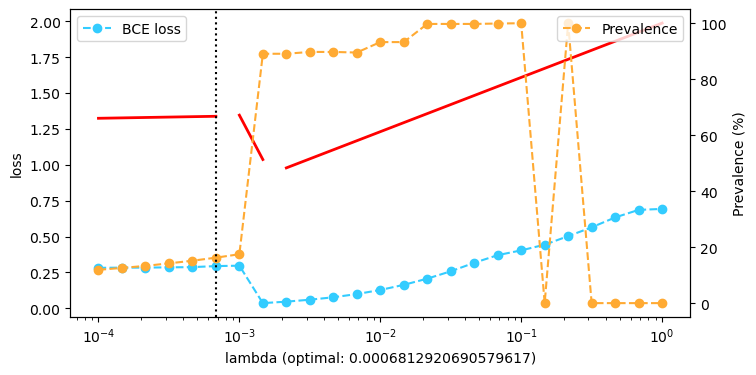

In [12]:
celltype = 'B'
with open(f'./{celltype}/{celltype}_tuning.json') as f:
    tuning = json.load(f)
for k in tuning.keys():
    tuning[k] = np.array(tuning[k])

opt_lmbd, fig = ad.lambda_decision(tuning, k=3)

In [18]:
# Count feature number of B cells
log_opt_lmbd = np.log(opt_lmbd)
# print(log_opt_lmbd)

log_lambda_range = tuning['log_lambda_range']
# idx = log_lambda_range.index(log_opt_lmbd)
idx = np.where(log_lambda_range == log_opt_lmbd)[0][0]

feature_no_celltype = int(tuning['Feature_number'][idx])
print(feature_no_celltype)

8054


## Lambda decision with new k=3

In [21]:
def lambda_decision_from_tuning(celltype):
    with open(f'./{celltype}/{celltype}_tuning.json') as f:
        tuning = json.load(f)
    for k in tuning.keys():
        tuning[k] = np.array(tuning[k])

    opt_lmbd, fig = ad.lambda_decision(tuning, k=3, savepath=f'/Users/evanli/Documents/EvanPys/Progress/PBMC_Hao/Remove_pvl0_v2/{celltype}_lambda_decision.png')

    # Count feature number of B cells
    log_opt_lmbd = np.log(opt_lmbd)
    # print(log_opt_lmbd)

    log_lambda_range = tuning['log_lambda_range']
    idx = np.where(log_lambda_range == log_opt_lmbd)[0][0]

    feature_no_celltype = int(tuning['Feature_number'][idx])

    return opt_lmbd, feature_no_celltype


B
0.0006812920690579617
8054
CD4_T
0.006812920690579619
28
CD8_T
0.0010000000000000002
7064
DC
0.046415888336127815
0
Mono
0.004641588833612781
21
NK
0.0010000000000000002
7303
other
0.046415888336127815
0
other_T
0.0006812920690579617
81


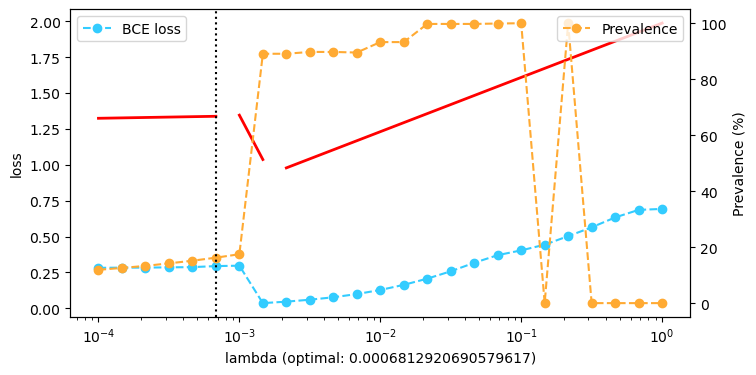

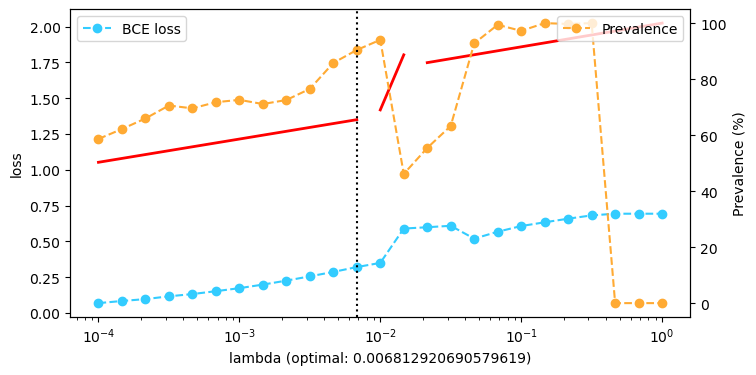

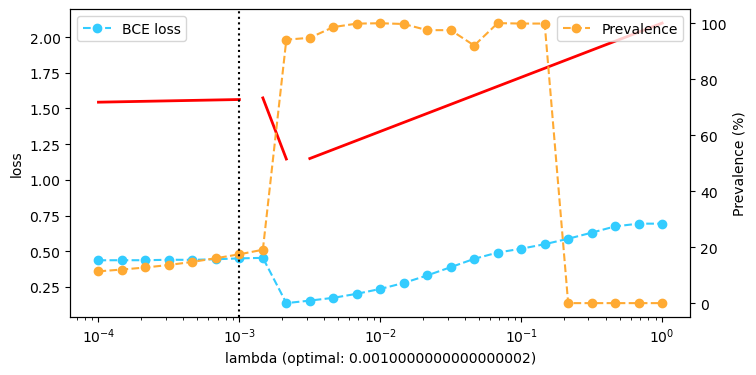

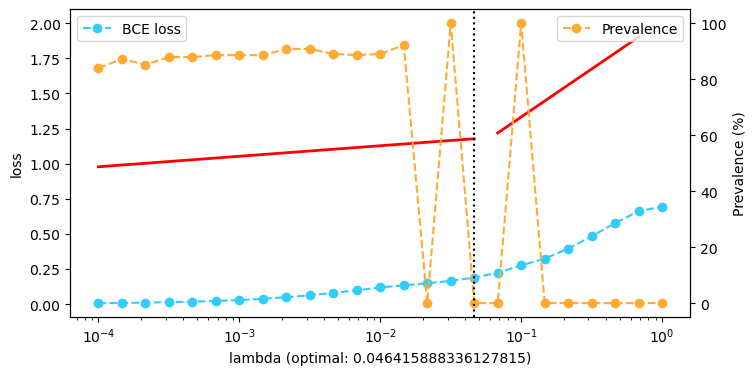

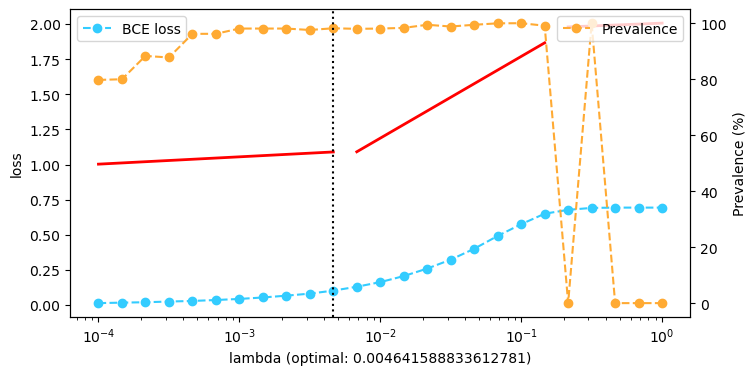

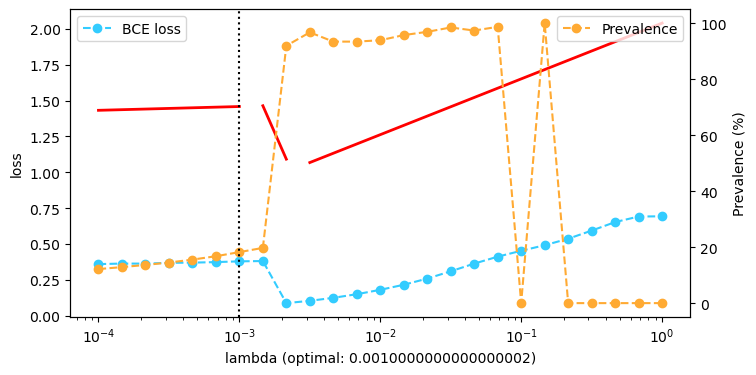

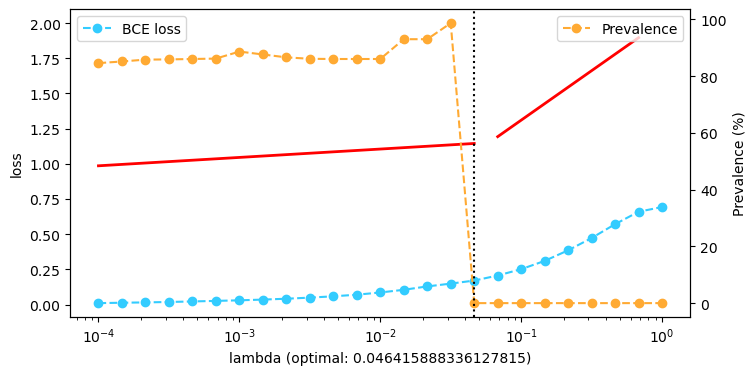

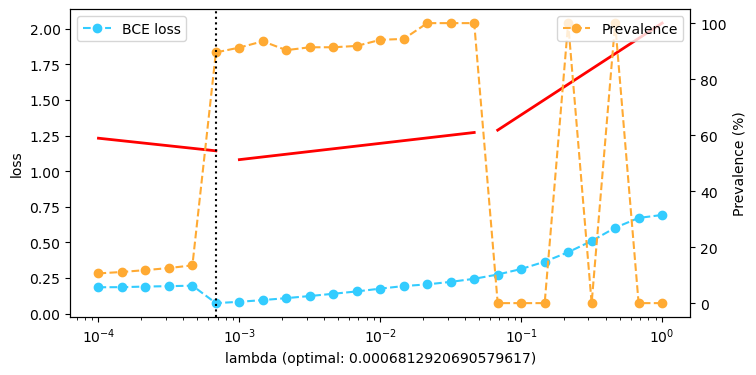

In [22]:
for celltype in types:
    print(celltype)
    opt_lmbd, feature_no_celltype = lambda_decision_from_tuning(celltype)
    print(opt_lmbd)
    print(feature_no_celltype)